## Steps:   Data Wrangling (EDA)
1. Import Libraries
2. Import Data
3. Explore Your Data
     1. Information
     2. Data Types
     3. Missing Values
     4. Take Sense of Your Data
4. Understanding the Variables
5. Relationship between the Variables(Heatmap, Pairplot, Corelation)
6. Brainstorming
     1. Normalize(Techniques)
     2. Removing Outliers
7. Tidy Data, Clean Data
8. Ready for Statistical Analysis
9. Ready for Prediction
10. Ready for Machine Learning
11. Ready for Deep Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## 1. Import Data Set

In [2]:
df = sns.load_dataset('titanic')
# df = pd.read_csv('Titanic.csv')   if you have data file in your data directory
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2. Bigger Picture of Date
   (Understanding of Data)

In [3]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()     # Summary Statistics

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull()   # to find null values

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()   # Counting missing or null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df.isnull().sum()*100/len(df)    # percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
#  How to deal with missing or null values in EDA Analysis?
#  Categorical/Object, Numbers(int, float), Boolean

In [10]:
df['age'].max()

80.0

In [11]:
df['age'].min()

0.42

In [12]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
df['sex'].nunique()

2

In [14]:
df['age'].nunique()

88

In [15]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [16]:
df['age'].mean()

29.69911764705882

In [17]:
df1 = df     # so that our last data save as it is and next amendments on data frames do not disturb last data frame

In [18]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
df1['age'].fillna(df1['age'].mean(), inplace=True)    # put average of age  in null values

C:\Users\mnzir\AppData\Local\Temp\ipykernel_16228\1539381354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['age'].fillna(df1['age'].mean(), inplace=True)    # put average of age  in null values


In [20]:
df1['age'].isnull().sum()

0

In [21]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df2 = df1      # so that our last data save as it is and next amendments on data frames do not disturb last data frame

In [23]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
df2.drop(columns = ['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [25]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [26]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
df3 = df2         # so that our last data save as it is and next amendments on data frames do not disturb last data frame

In [28]:
df3['embark_town'].fillna(df3['embark_town'].mode()[0], inplace=True)
df3['embarked'].fillna(df3['embarked'].mode()[0], inplace=True)

C:\Users\mnzir\AppData\Local\Temp\ipykernel_16228\4124052415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['embark_town'].fillna(df3['embark_town'].mode()[0], inplace=True)
C:\Users\mnzir\AppData\Local\Temp\ipykernel_16228\4124052415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [29]:
df3.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

## Mean, Median, Mode

In [30]:
print('Mean = ', df['age'].mean())
print('Mode = ', df['embark_town'].mode()[0])
print('Median = ', df['age'].median())

Mean =  29.69911764705882
Mode =  Southampton
Median =  29.69911764705882


<Axes: >

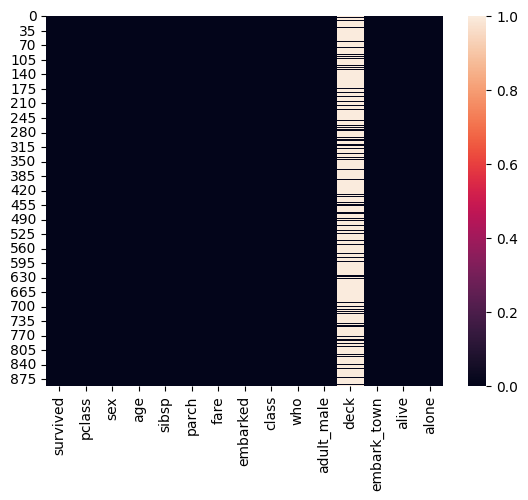

In [31]:
# Visualize the nan values using Heatmap

sns.heatmap(df.isnull())

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

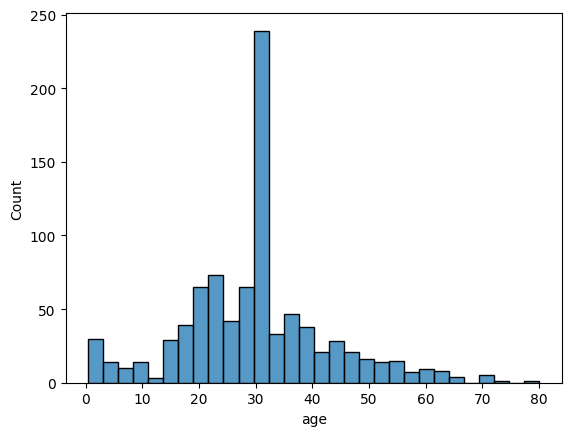

In [32]:
sns.histplot(df['age'])

### Binning

In [33]:
# binning of age coulumn into 7 categories

bins = [0,1,5,12,18,30,50,80]
labels = ['infants', 'toddler', 'kids', 'teenage', 'young', 'middle', 'old']

# which column has to be converted into bins

pd.cut(df['age'], bins=bins, labels=labels)

0       young
1      middle
2       young
3      middle
4      middle
        ...  
886     young
887     young
888     young
889     young
890    middle
Name: age, Length: 891, dtype: category
Categories (7, object): ['infants' < 'toddler' < 'kids' < 'teenage' < 'young' < 'middle' < 'old']

In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Feature Engineering

### Create a Coulmn

In [35]:
bins = [0,1,5,12,18,30,50,80]
labels = ['infants', 'toddler', 'kids', 'teenage', 'young', 'middle', 'old']

# which column has to be converted into bins
df['binned_age'] = pd.cut(df['age'], bins=bins, labels=labels)

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,binned_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,middle
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,middle


In [37]:
df['binned_age'].value_counts()

binned_age
young      447
middle     241
teenage     70
old         64
toddler     30
kids        25
infants     14
Name: count, dtype: int64

### Rename a Column

In [38]:
# Rename a column
df.rename(columns={'binned_age' : 'age_group'}, inplace=True)

In [39]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,middle
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,middle


## Data Filteration

In [40]:
# based on columns

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_group'],
      dtype='object')

In [41]:
df_1 = df[['survived', 'age_group', 'fare', 'class']]

In [42]:
df_1.head()

,survived,age_group,fare,class
0,0,young,7.2500,Third
1,1,middle,71.2833,First
2,1,young,7.9250,Third
3,1,middle,53.1000,First
4,0,middle,8.0500,Third


In [43]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [44]:
# filter the data based on rows criteria

df_first = df_1[df_1['class']  == 'first']

In [45]:
# filter data for numeric columns  for fare greater than 200

df_1[df_1['fare'] > 200]

,survived,age_group,fare,class
27,0,young,263.0000,First
88,1,young,263.0000,First
118,0,young,247.5208,First
258,1,middle,512.3292,First
299,1,middle,247.5208,First
311,1,teenage,262.3750,First
341,1,young,263.0000,First
377,0,young,211.5000,First
380,1,middle,227.5250,First
438,0,old,263.0000,First


In [46]:
df_200 = df_1[df_1['fare'] > 200]
df_200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 27 to 779
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   20 non-null     int64   
 1   age_group  20 non-null     category
 2   fare       20 non-null     float64 
 3   class      20 non-null     category
dtypes: category(2), float64(1), int64(1)
memory usage: 1008.0 bytes


In [47]:
df_200['class'].value_counts()

class
First     20
Second     0
Third      0
Name: count, dtype: int64

In [48]:
# how to add two filters

df_1[(df_1['fare'] > 70) & (df_1['class'] == 'first')].sort_values(by='fare')

,survived,age_group,fare,class


<Axes: xlabel='survived', ylabel='count'>

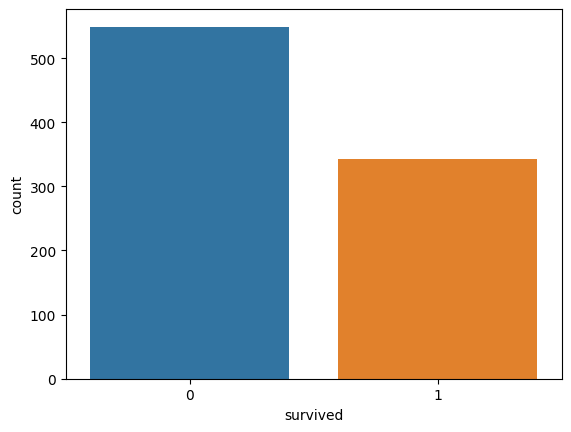

In [49]:
sns.countplot(data=df, x='survived') #   categorical data

<Axes: xlabel='survived', ylabel='fare'>

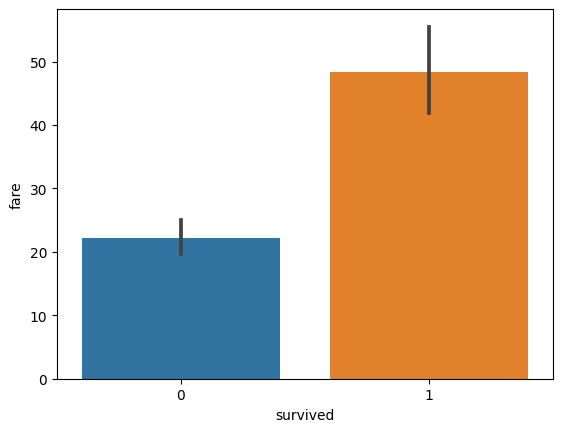

In [50]:
sns.barplot(data=df, x='survived', y='fare')     # x-axis = categorical data and y-axis = numerical data

<Axes: xlabel='survived', ylabel='fare'>

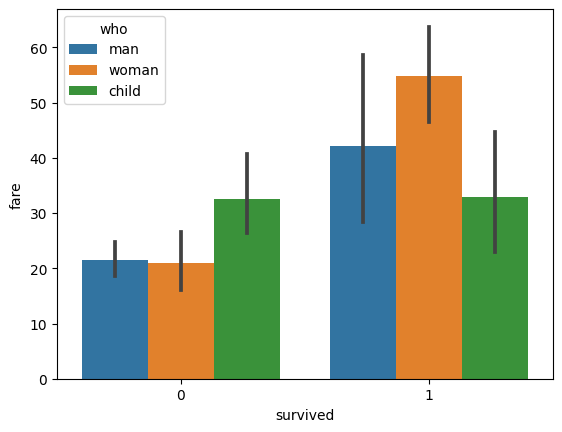

In [51]:
sns.barplot(data=df, x='survived', y='fare', hue='who')

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

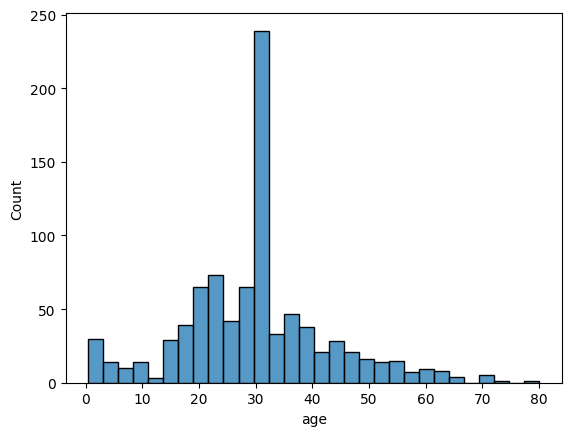

In [52]:
#Data Distribution
sns.histplot(data=df, x='age')

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

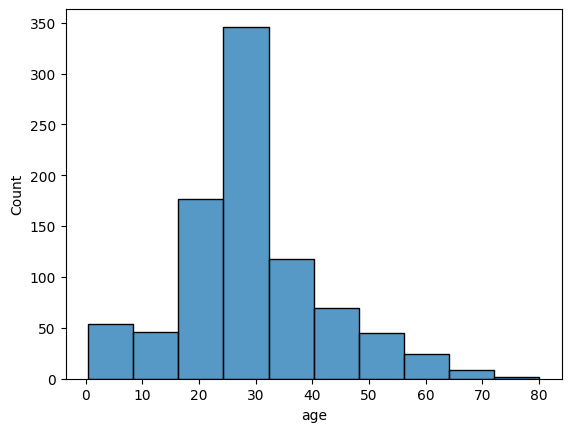

In [53]:
sns.histplot(data=df, x='age', bins=10)

<Axes: >

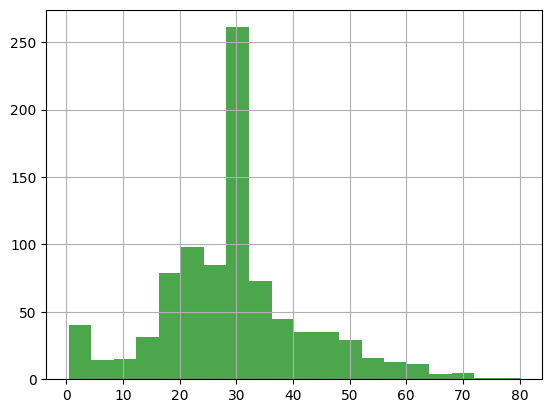

In [54]:
df['age'].hist(bins=20, color='green', alpha=0.7)

<Axes: xlabel='survived', ylabel='age'>

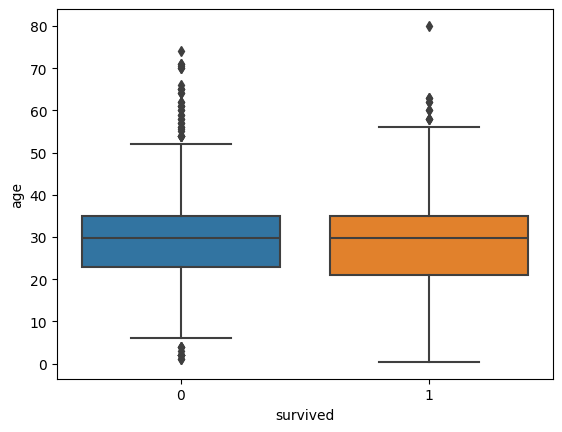

In [55]:
sns.boxplot(data= df, x='survived', y='age')

<Axes: xlabel='survived', ylabel='age'>

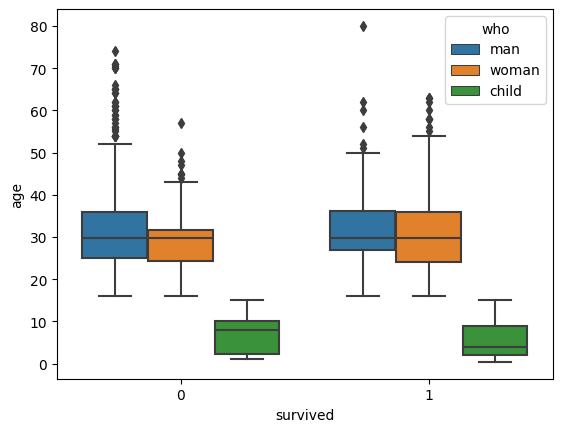

In [56]:
sns.boxplot(data= df, x='survived', y='age', hue='who')

<Axes: xlabel='age', ylabel='fare'>

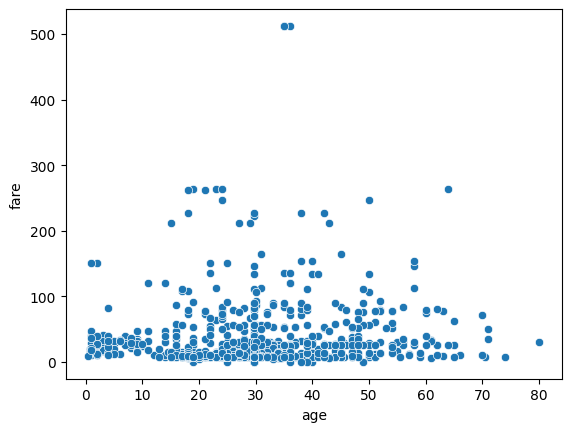

In [57]:
sns.scatterplot(x = 'age', y = 'fare', data = df)     # Numeric data on both axis

(0.0, 300.0)

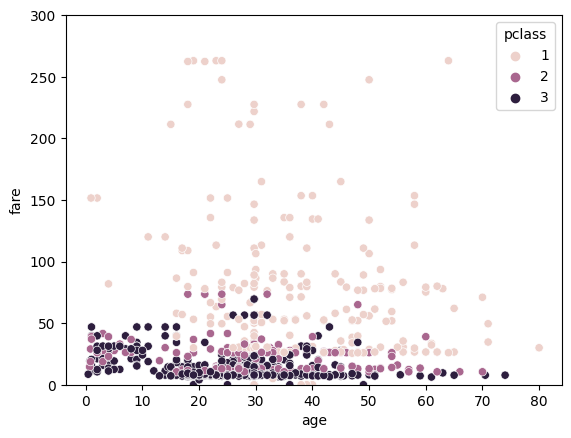

In [58]:
sns.scatterplot(x = 'age', y = 'fare', data = df, hue = 'pclass') #  Data is in unnormalized form
plt.ylim(0,300)

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will

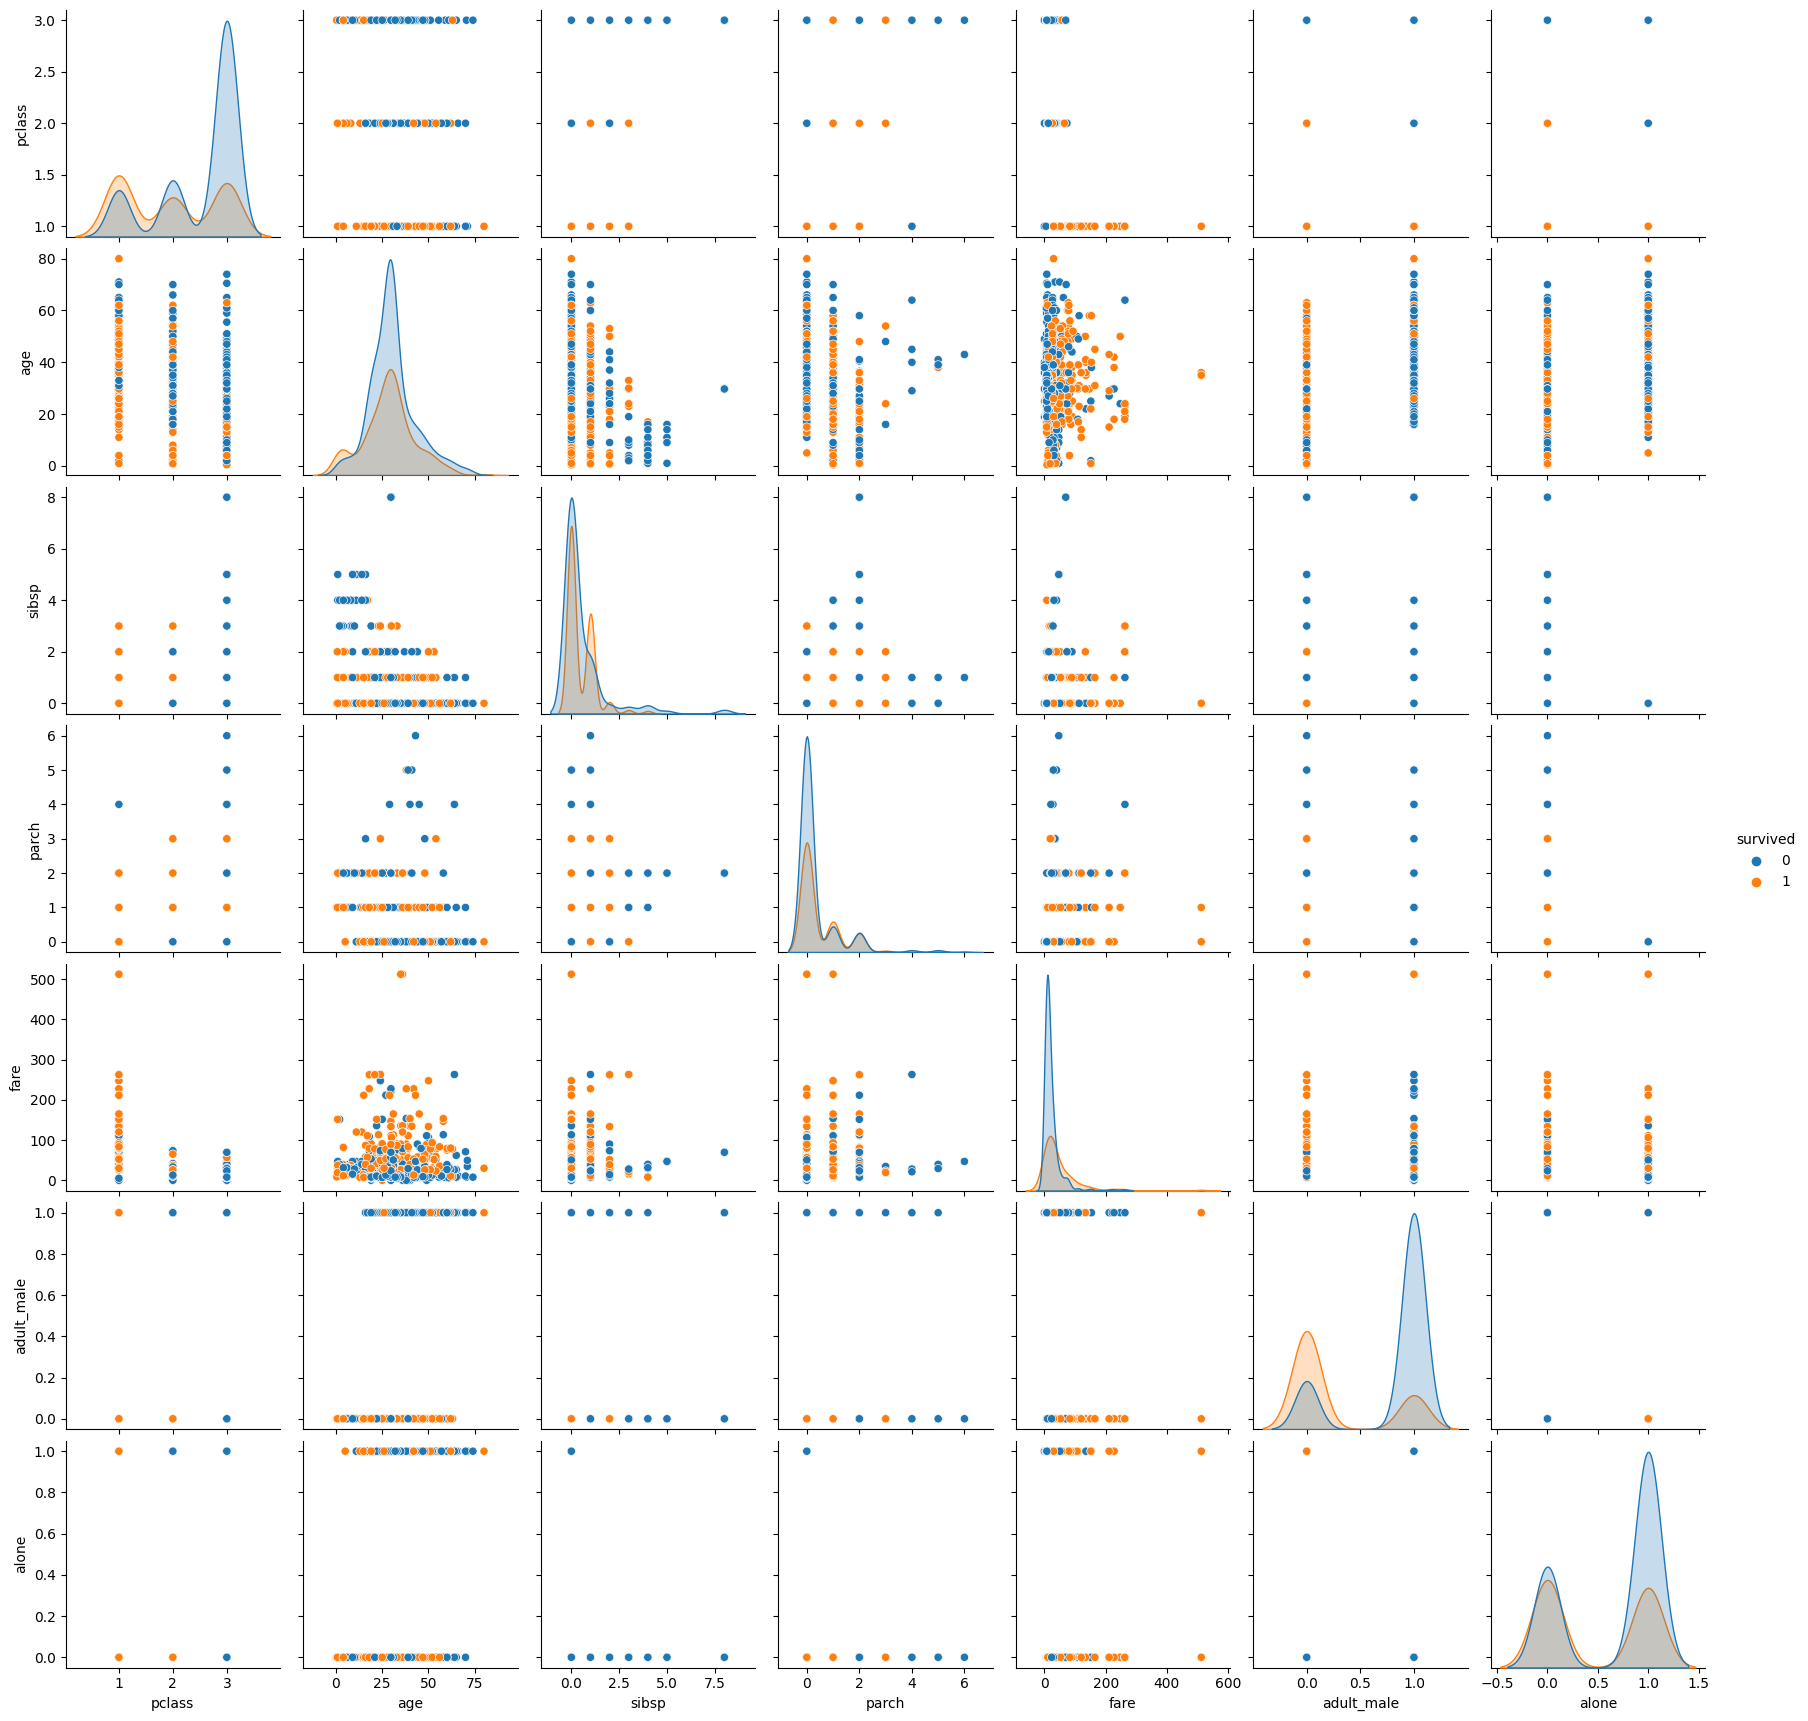

In [59]:
sns.pairplot(df, hue='survived')      # Pair plot used  to see relation between each parameter

<Axes: xlabel='pclass'>

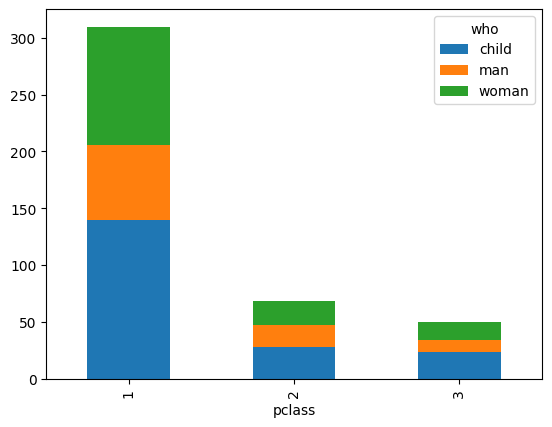

In [60]:
# Stacked Barchart/Plot
df.groupby(['pclass', 'who'])['fare'].mean().unstack().plot(kind='bar', stacked=True)

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

<Axes: xlabel='age', ylabel='fare'>

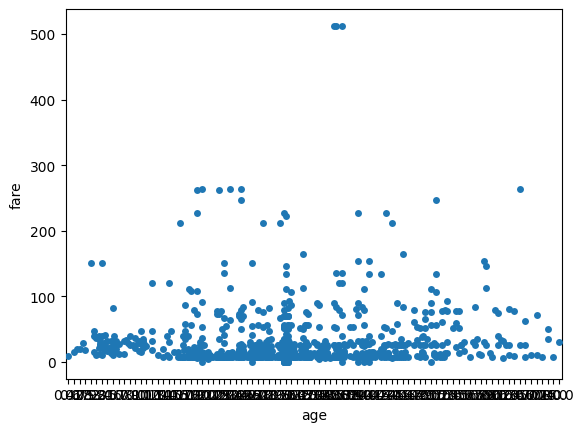

In [61]:
sns.swarmplot(data=df, x='age', y='fare')

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

<Axes: xlabel='survived', ylabel='fare'>

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


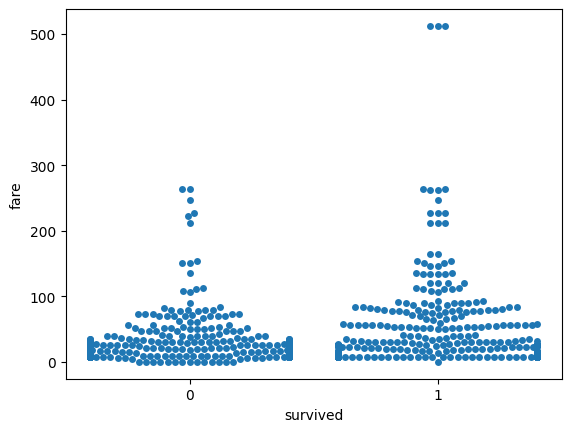

In [62]:
sns.swarmplot(data=df, x='survived', y='fare')

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

<Axes: xlabel='survived', ylabel='age'>

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


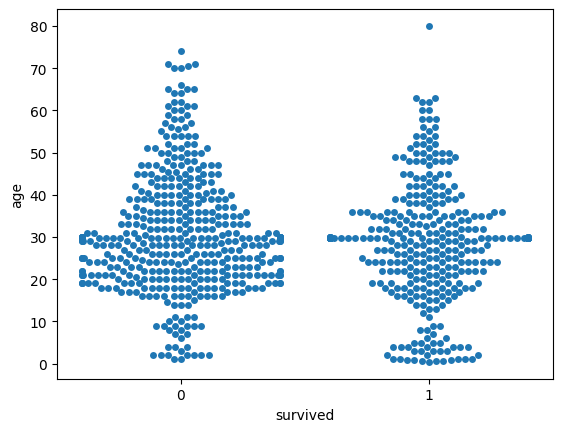

In [63]:
sns.swarmplot(data=df, x='survived', y='age')

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

<Axes: xlabel='survived', ylabel='age'>

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


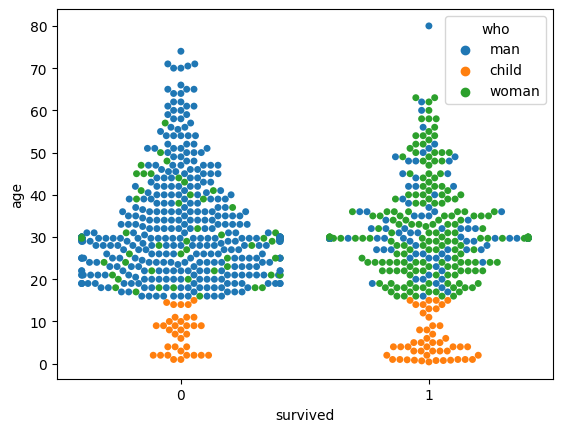

In [64]:
sns.swarmplot(data=df, x='survived', y='age', hue='who')

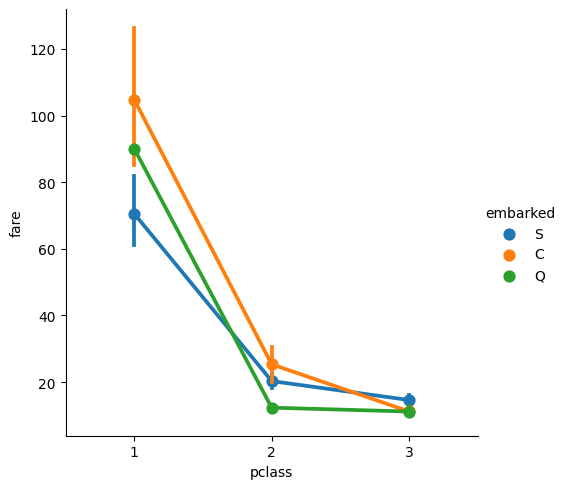

In [65]:
sns.catplot(data=df, x='pclass', y='fare', kind='point', hue='embarked')

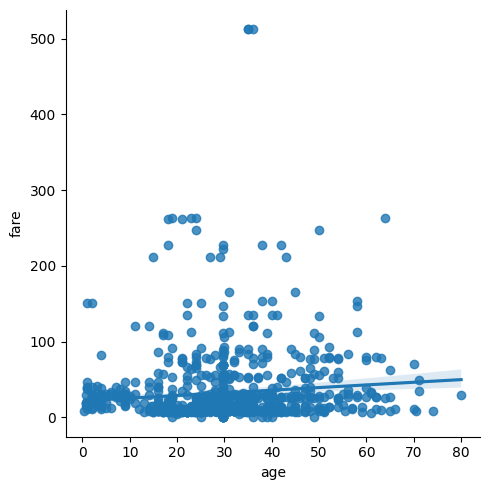

In [66]:
# relation of two numerical variables

sns.lmplot(data=df, x='age', y='fare')

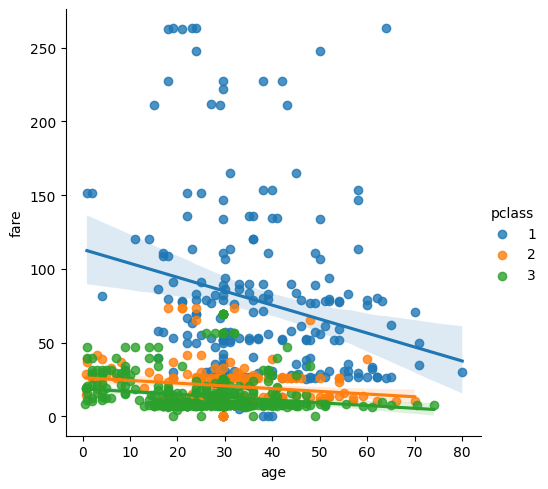

In [67]:
sns.lmplot(data=df[df['fare']<300], x='age', y='fare', hue='pclass')
#plt.ylim(0,300)


In [68]:
# How to add column and make an age group

df['age_groups'] = pd.cut(df['age'],[0,10,18,30,50,80],labels =['kids', 'child','youth', 'middle aged', 'old'])

In [69]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,age_groups
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,youth
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,middle,middle aged
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young,youth
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,middle,middle aged
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,middle,middle aged


C:\Users\mnzir\AppData\Local\Temp\ipykernel_16228\3917584871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_groups')['fare'].mean().plot(kind='bar')


<Axes: xlabel='age_groups'>

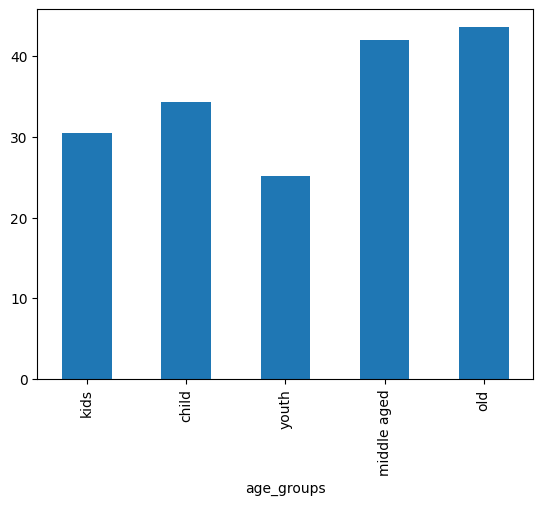

In [70]:
df.groupby('age_groups')['fare'].mean().plot(kind='bar')

C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\mnzir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be re

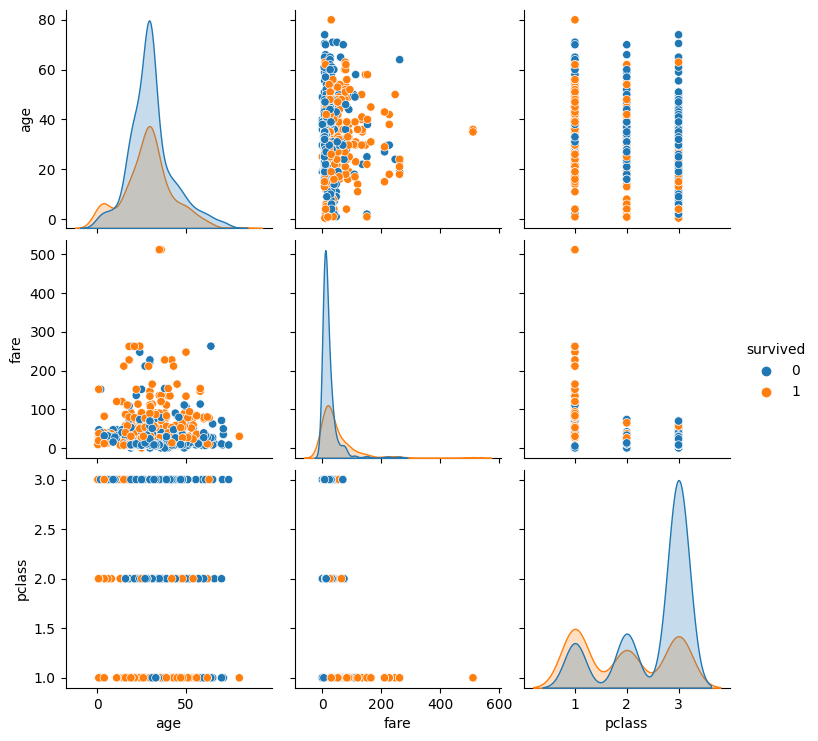

In [71]:
sns.pairplot(df, hue='survived', vars=['age', 'fare','pclass'])